## 데이터셋 설명

이 CSV 파일은 보스턴 주택 가격 데이터셋으로, 각 칼럼은 다음과 같은 의미를 가지고 있습니다:

1. **CRIM**: 범죄율 (인구 1인당 범죄 수)
2. **ZN**: 25,000 평방피트를 초과하는 거주 지역의 비율
3. **INDUS**: 비소매 상업 지역의 비율
4. **CHAS**: 찰스 강에 대한 더미 변수 (1: 강에 인접, 0: 인접하지 않음)
5. **NOX**: 질소 산화물 농도 (10배의 역수)
6. **RM**: 주택당 평균 방 수
7. **AGE**: 1940년 이전에 건축된 비율
8. **DIS**: 5개의 보스턴 고용 센터까지의 가중 거리
9. **RAD**: 고속도로 접근성 지수
10. **TAX**: 10,000달러당 재산세율
11. **PTRATIO**: 학생-교사 비율
12. **B**: 1000(Bk - 0.63)^2 (Bk는 흑인 인구 비율)
13. **LSTAT**: 하위 계층 인구 비율
14. **MEDV**: 중간 주택 가격 (단위: 1,000달러)

이 데이터셋은 주택 가격 예측 모델을 훈련하는 데 자주 사용됩니다. 각 칼럼은 주택 가격에 영향을 미치는 다양한 요인을 나타냅니다.

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

# 데이터 불러오기
df = pd.read_csv('housingdata.csv')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 데이터셋 탐색 및 전처리

In [90]:
# 결측치 확인
print(df.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [91]:
# 결측치 처리
# 중앙값으로 대체
df_dropped = df.fillna(df.median())

print(df_dropped.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [92]:
# 데이터 탐색
df_dropped.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


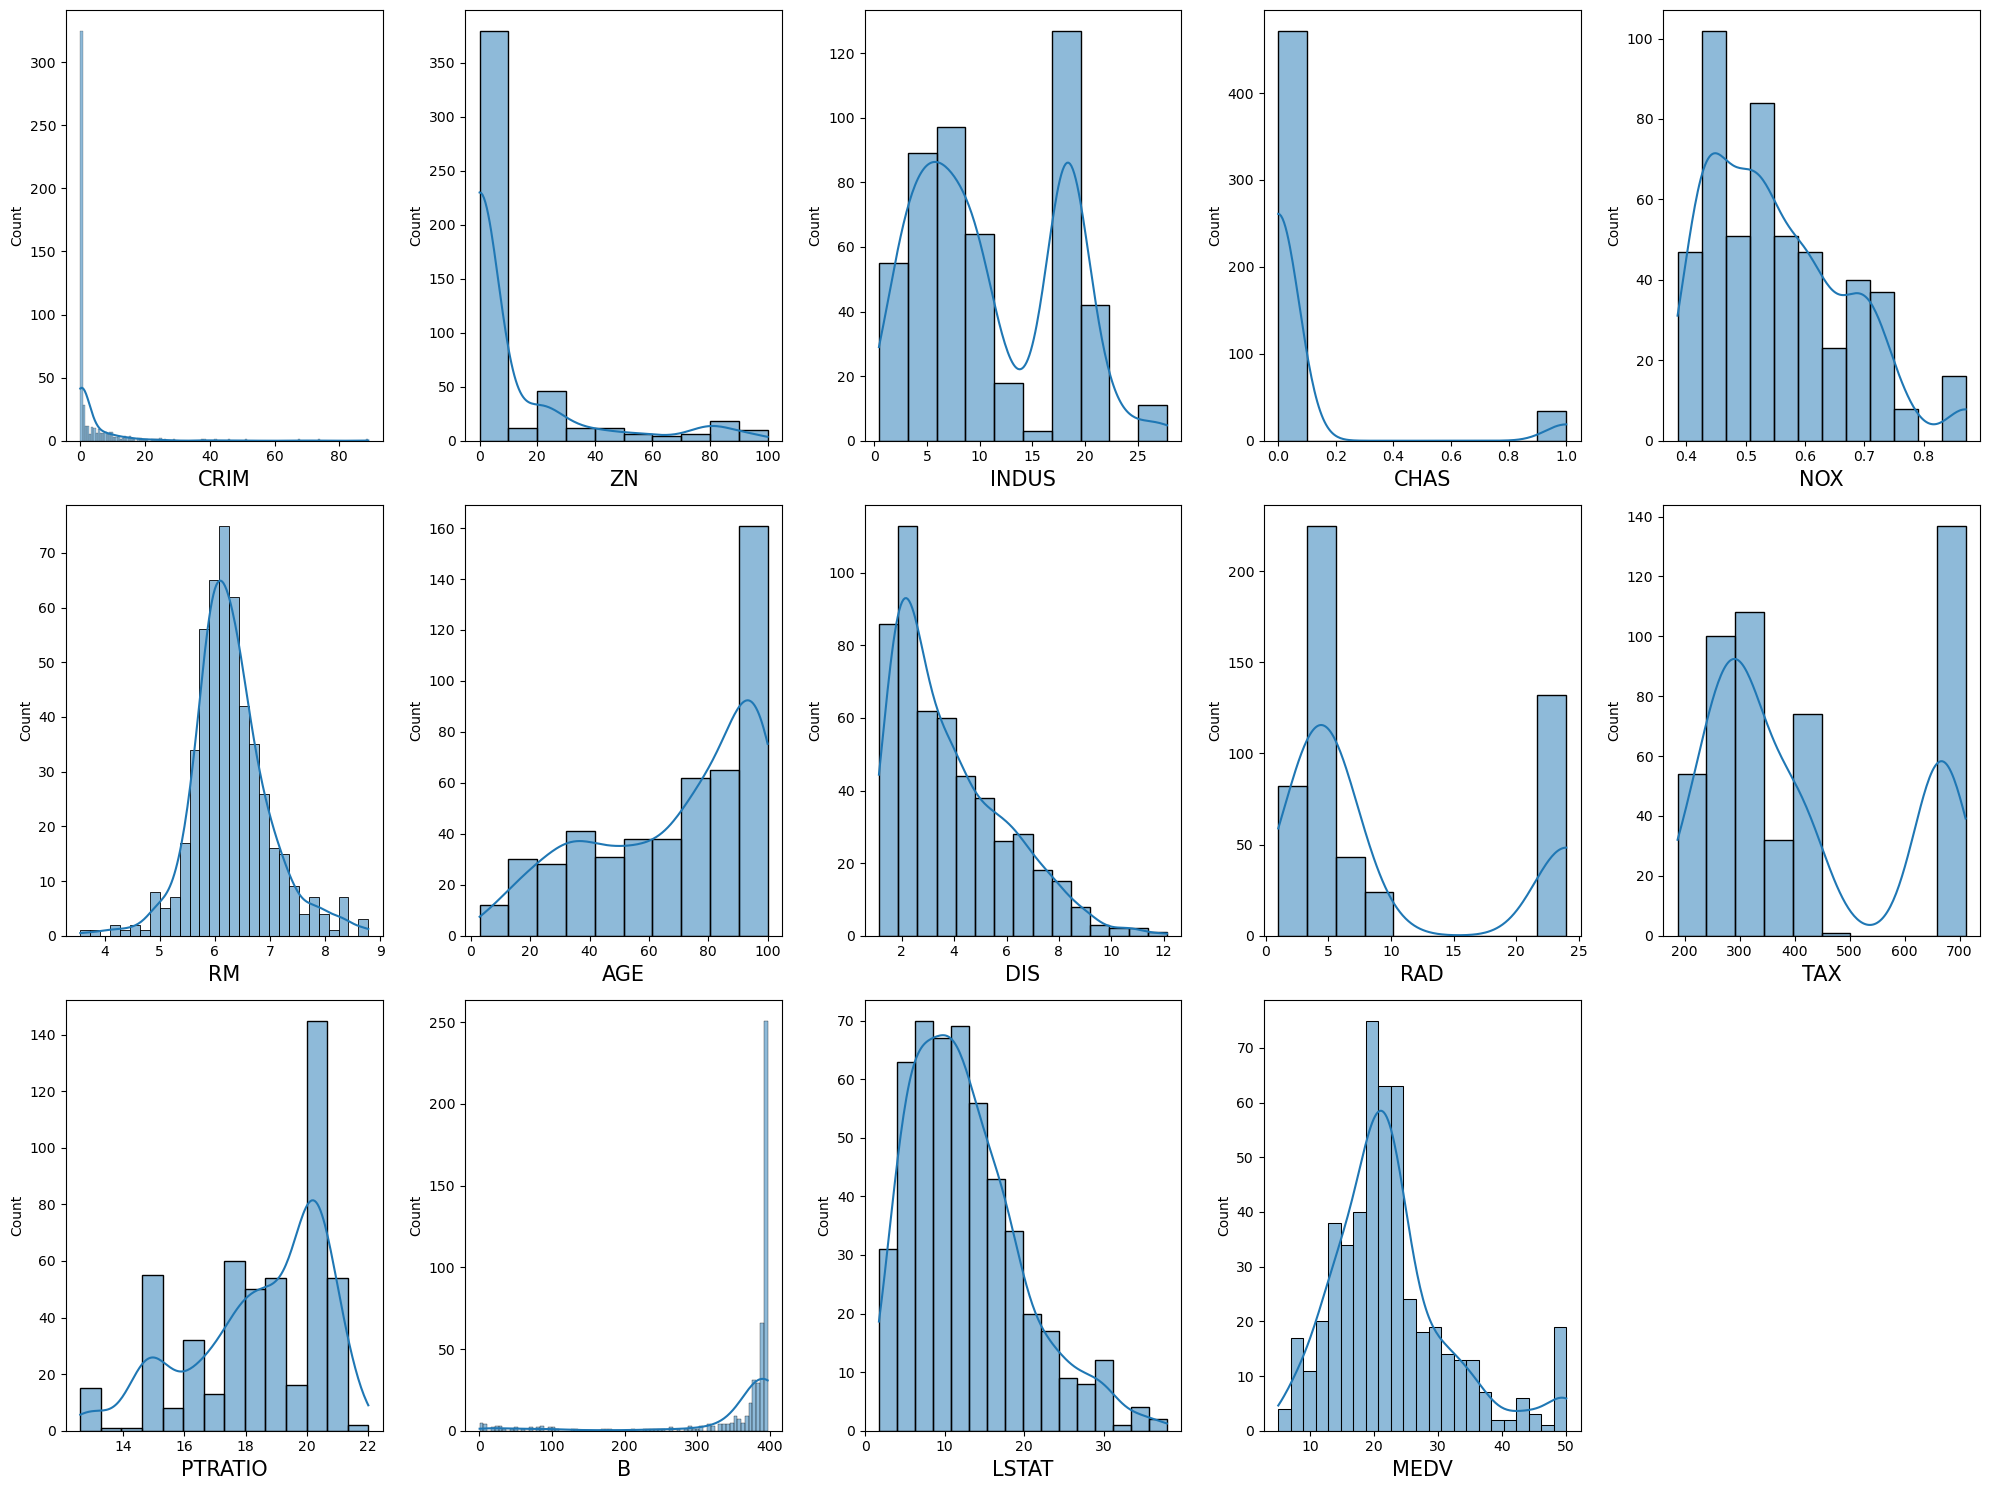

In [93]:
#분포 확인
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df_dropped[column], kde=True)  # distplot을 histplot으로 대체, kde 추가
        plt.xlabel(column, fontsize=15)
        plotnumber += 1

plt.tight_layout()
plt.show()

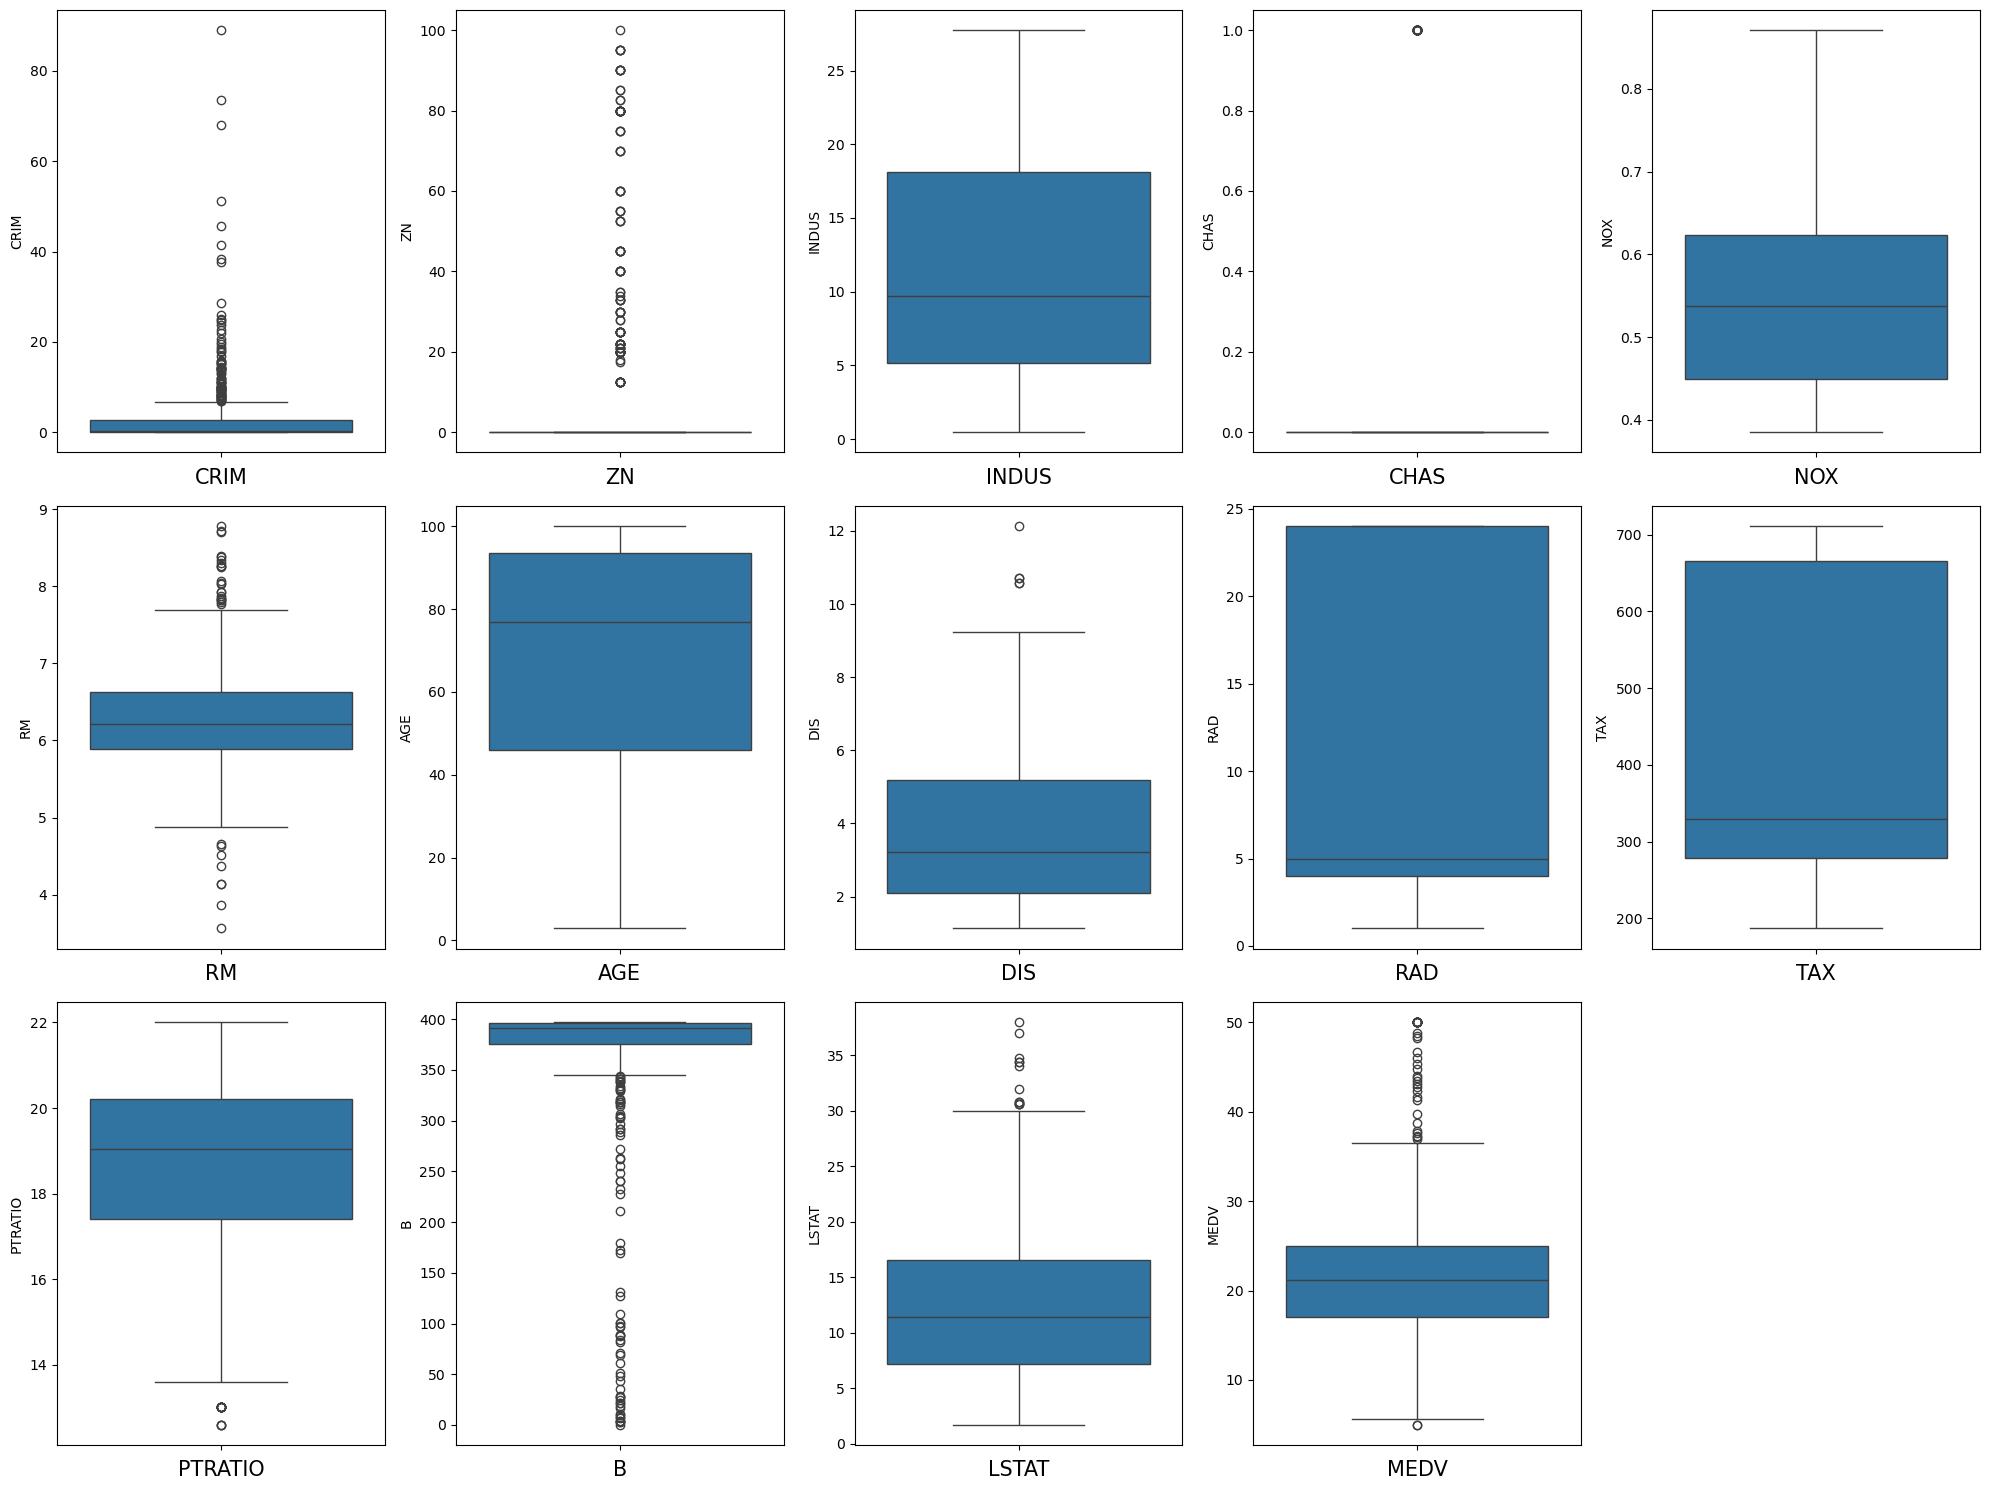

In [94]:
#이상치 확인
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df.columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.boxplot(y=df_dropped[column], ax=ax) # 박스 플롯만 그림
        plt.xlabel(column, fontsize=15)
        plotnumber += 1

plt.tight_layout()
plt.show()

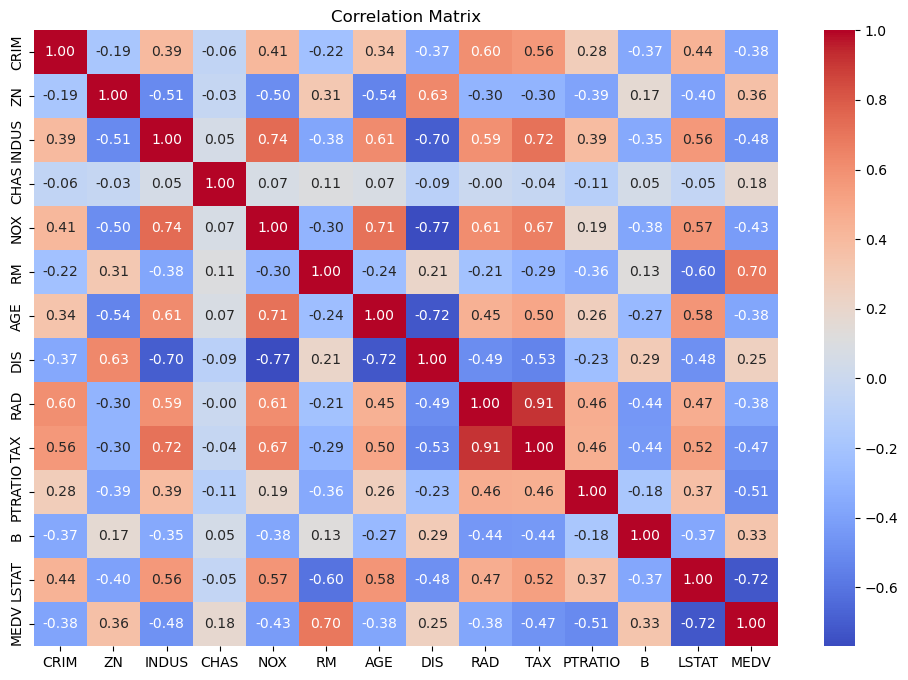

In [95]:
# 상관관계 행렬
correlation_matrix = df_dropped.corr()

# 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#상관계수가 절대값 0.3 이상이면 상관관계가 있다고 볼것. 대충참고만

#음이랑 양의 차이는 

In [96]:
# 데이터 분할 (훈련 세트와 테스트 세트)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 상관관계가 높은 변수들만 선택(상관계수 0.38 이상), RAD는 제외(다중공선성 문제)
X = df_dropped.drop(columns=['MEDV','CHAS']) # MEDV는 타겟 변수
y = df_dropped['MEDV']

# 타겟을 제외한 특성들을 정규화(Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled를 다시 데이터프레임으로 변환(numpy array -> DataFrame)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(404, 12)


In [97]:
# 훈련 데이터에 대해서만 IQR을 사용하여 이상치 처리

for column in X_train.drop(columns=['CRIM','ZN']).columns: # CRIM, ZN은 이상치가 많아서 제외
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 대체
    X_train[column] = X_train[column].clip(lower=lower_bound, upper=upper_bound)


# 결과 확인
print(X_train.shape)


(404, 12)


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred= model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
performance_metrics = {}
performance_metrics['LinearRegression'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'Actual':y_test, 'Predict':y_pred} # 성능 지표를 딕셔너리에 저장

print(f'Mean_Absolute_Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean_Absolute_Error: 3.397416530644141
Mean Squared Error: 29.730348774593196
R^2 Score: 0.5945886398687976


In [99]:
from sklearn.tree import DecisionTreeRegressor
# 의사결정 회귀 모델 생성
model = DecisionTreeRegressor(random_state=42) # 트리구조니까 랜덤스테이트 고정

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred= model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
performance_metrics['DecisionTreeRegressor'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'Actual':y_test, 'Predict':y_pred}  # 성능 지표 저장



print(f'Mean_Absolute_Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean_Absolute_Error: 2.744117647058824
Mean Squared Error: 13.709117647058823
R^2 Score: 0.8130586333301825


In [100]:
from sklearn.ensemble import RandomForestRegressor
# 랜덤포레스트 모델 생성
model = RandomForestRegressor(random_state=42)

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
performance_metrics['RandomForestRegressor'] = {'MSE': mse, 'MAE': mae, 'R²': r2, 'Actual':y_test, 'Predict':y_pred} # 성능 지표 저장

print(f'Mean_Absolute_Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean_Absolute_Error: 2.088823529411764
Mean Squared Error: 8.55616464705882
R^2 Score: 0.8833257432205119


In [101]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # XGBoost 모델 생성 (하이퍼파라미터 튜닝 없이 기본 설정 사용)
# xgb = XGBRegressor(random_state=42)

# # 모델 훈련
# xgb.fit(X_train, y_train)

# # 예측
# y_pred_xgb = xgb.predict(X_test)

# # 성능 평가
# mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# r2_xgb = r2_score(y_test, y_pred_xgb)

# performance_metrics['XGBoostRegressor'] = {'MSE': mse_xgb, 'MAE': mae_xgb, 'R²': r2_xgb, 'Actual': y_test, 'Predict': y_pred_xgb} # 성능 지표 저장


# print(f'XGBoost Mean Absolute Error: {mae_xgb}')
# print(f'XGBoost Mean Squared Error: {mse_xgb}')
# print(f'XGBoost R^2 Score: {r2_xgb}')

In [102]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBoost 모델 생성 (하이퍼파라미터 튜닝을 위한 랜덤 서치 추가)
xgb = XGBRegressor(random_state=42)

# 랜덤 서치를 위한 하이퍼파라미터 범위 설정
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]
}

# 랜덤 서치 객체 생성
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_distributions,
    n_iter=10,  # 테스트할 파라미터 조합 수
    cv=3,       # 교차 검증 횟수
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1 # 모든 코어 사용
)


# 랜덤 서치 수행
random_search.fit(X_train, y_train)


# 최적 모델 저장
best_xgb = random_search.best_estimator_

# 최적 모델 예측
y_pred_xgb = best_xgb.predict(X_test)

# 성능 평가
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

performance_metrics['XGBoostRegressor'] = {'MSE': mse_xgb, 'MAE': mae_xgb, 'R²': r2_xgb, 'Actual': y_test, 'Predict': y_pred_xgb} # 성능 지표 저장



print(f'XGBoost Mean Absolute Error: {mae_xgb}')
print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')
labels = performance_metrics.keys()
mse_values = [metrics['MSE'] for metrics in performance_metrics.values()]
mae_values = [metrics['MAE'] for metrics in performance_metrics.values()]
r2_values = [metrics['R²'] for metrics in performance_metrics.values()]


XGBoost Mean Absolute Error: 1.888876609241261
XGBoost Mean Squared Error: 6.308974755900665
XGBoost R^2 Score: 0.9139690537701031


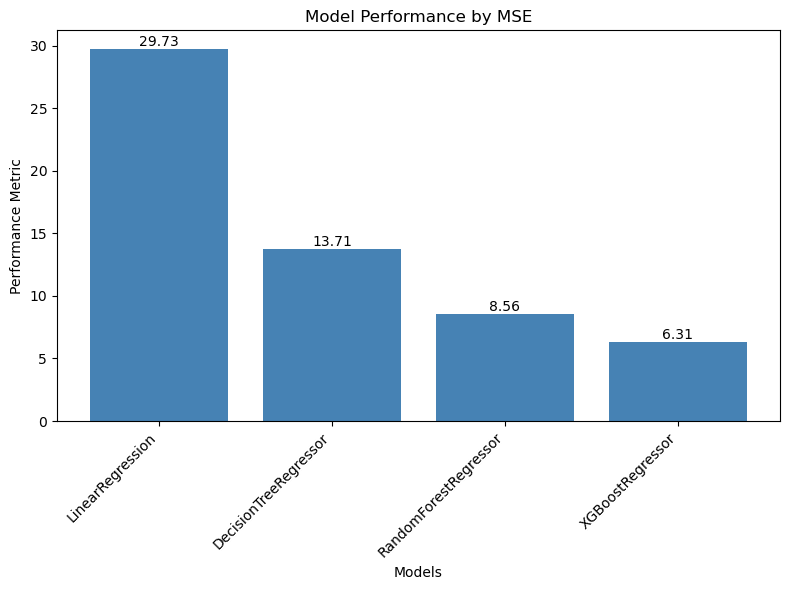

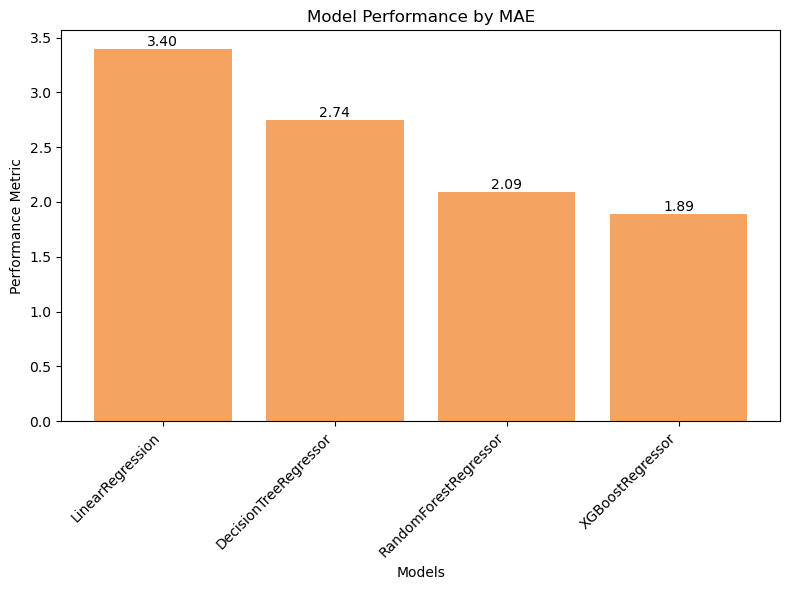

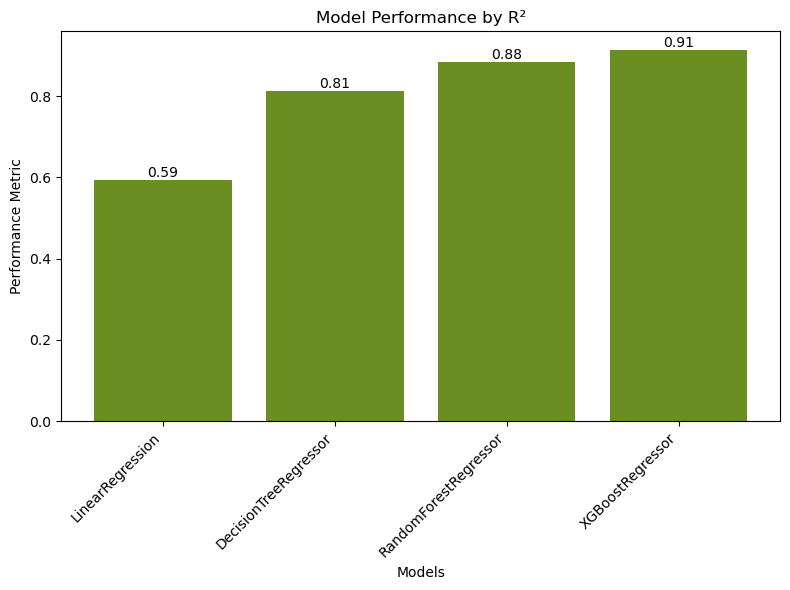

In [103]:
# 딕셔너리에서 모델 이름과 성능 지표 추출
labels = performance_metrics.keys()
mse_values = [metrics['MSE'] for metrics in performance_metrics.values()]
mae_values = [metrics['MAE'] for metrics in performance_metrics.values()]
r2_values = [metrics['R²'] for metrics in performance_metrics.values()]

# 모델 이름과 성능 지표 추출
model_names = list(performance_metrics.keys())
metrics = ['MSE', 'MAE', 'R²']

# 각 성능 지표에 대한 값을 모델별로 분리
mse_values = [performance_metrics[model]['MSE'] for model in model_names]
mae_values = [performance_metrics[model]['MAE'] for model in model_names]
r2_values = [performance_metrics[model]['R²'] for model in model_names]


bar_width = 0.8  # 막대 너비 설정 (조정 가능)
x = np.arange(len(model_names))

# 각 성능 지표별로 그래프 생성
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 6))  # 각 그래프 크기 설정
    
    if metric == 'MSE':
        values = mse_values
        color = 'steelblue' # 색상 지정
    elif metric == 'MAE':
        values = mae_values
        color = 'sandybrown' # 색상 지정
    else:
        values = r2_values
        color = 'olivedrab' # 색상 지정

    bars = plt.bar(x, values, width=bar_width, color=color)  # 막대 그래프 생성
    
    # 막대 위에 값을 표시
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{value:.2f}', ha='center', va='bottom')

    plt.title(f'Model Performance by {metric}')  # 그래프 제목 설정
    plt.xlabel('Models')  # x축 레이블 설정
    plt.ylabel('Performance Metric')  # y축 레이블 설정
    
    plt.xticks(x, model_names, rotation=45, ha='right')  # x축 눈금 설정 및 레이블 회전
    plt.tight_layout()  # 레이아웃 자동 조정
    plt.show()

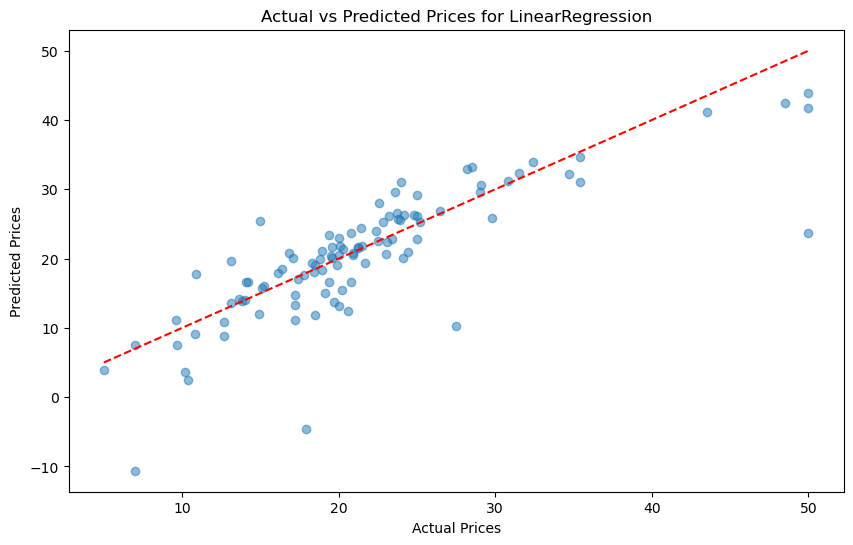

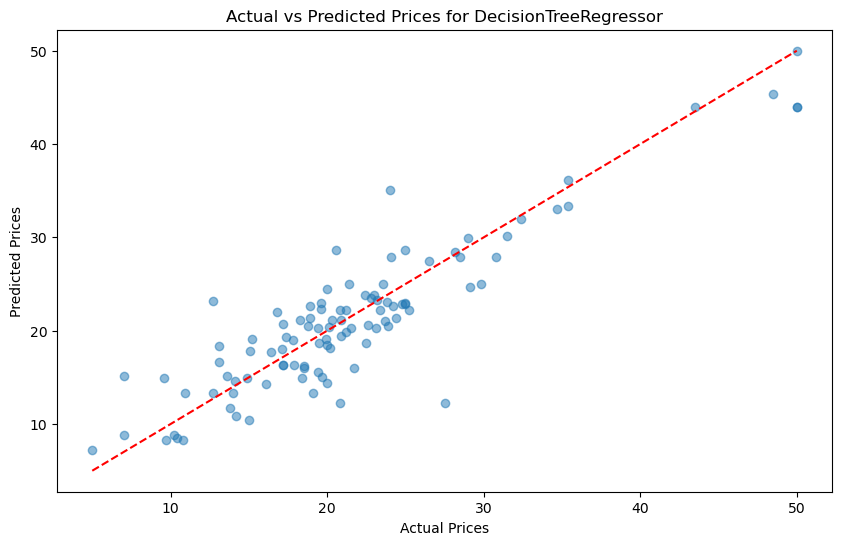

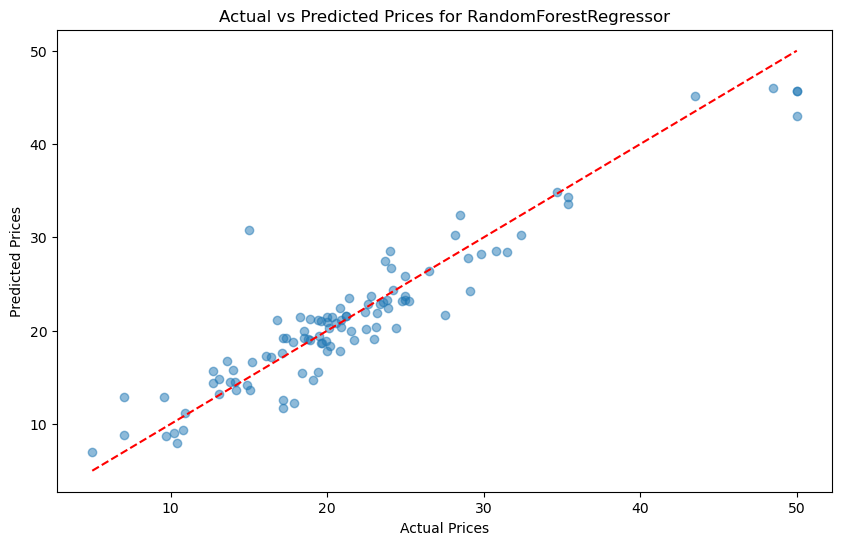

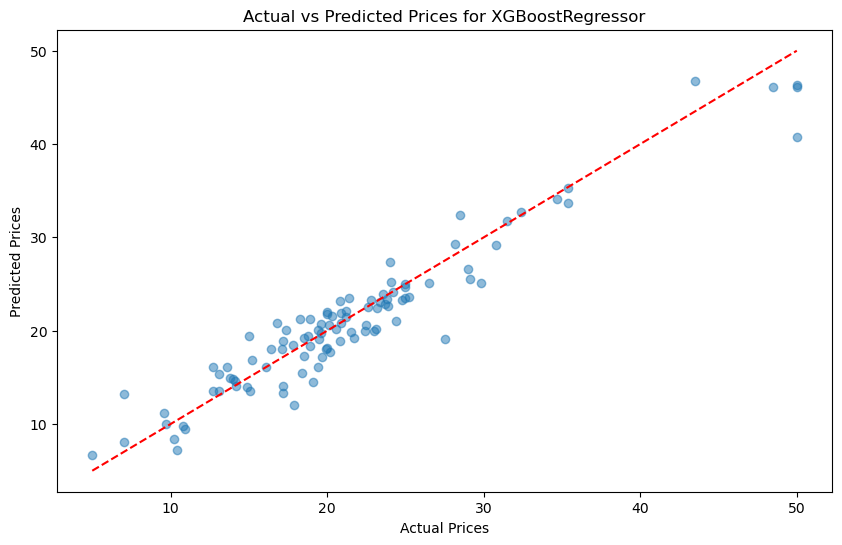

In [104]:
# 모델별 산점도 그리기
for model_name, metrics in performance_metrics.items():
    # 키가 존재하는지 확인
    if 'Actual' in metrics and 'Predict' in metrics:
        y_test_actual = metrics['Actual']
        y_predicted = metrics['Predict']
    
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test_actual, y_predicted, alpha=0.5)
        plt.title(f'Actual vs Predicted Prices for {model_name}')
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.plot([y_test_actual.min(), y_test_actual.max()], 
                 [y_test_actual.min(), y_test_actual.max()], 
                 color='red', linestyle='--')  # y=x 선 추가
        plt.show()
    else:
        print(f"'{model_name}' 모델에 필요한 키가 없습니다.")